# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [1]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [80]:
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()


The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


Set the date column as index

In [4]:
url = 'power_demand_vs_temperature.csv'
sep = ','
df = pd.read_csv(url, sep=sep, index_col='date')
df.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


### Explore the dataset and check for missing values


In [5]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [6]:
# # Find rows containing null values
# rows_with_null = df[df.isnull().any(axis=1)]

# # Count the rows containing null values
# num_rows_with_null = len(rows_with_null)
# print(num_rows_with_null)

#how to find columns with missing values
rows_with_nulls = df[df.isnull().any(axis=1)]
#now count the rows containing null values
num_rows_with_nulls = len(rows_with_nulls)
print(num_rows_with_nulls)

0


### Create X and y 

In [7]:
target = 'temp'
X = df.drop(target, axis=1)
y = df[target]
print(X.shape)
print(y.shape)

(1096, 1)
(1096,)


### Plot the distribution



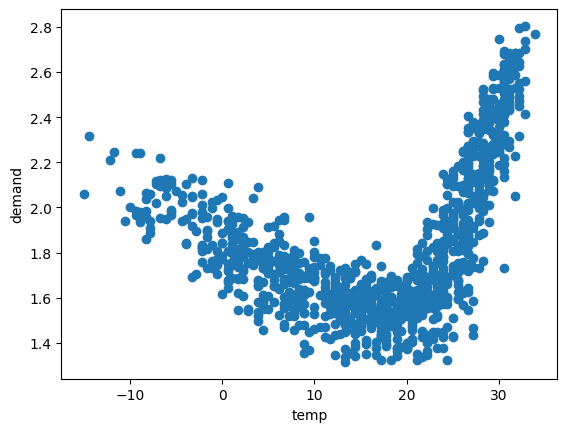

In [14]:
plt.xlabel('temp')
plt.ylabel('demand')
plt.scatter(y, X)

### Divide the dataset in train and test splits

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Training and test set have {Xtrain.shape[0]} and {Xtest.shape[0]} elements respectively')

Training and test set have 767 and 329 elements respectively


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [16]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def evaluate(ytrue, ypred, n_obs, n_var):
    y_true = np.array(ytrue)
    y_pred = np.array(ypred)
    y_true_m= np.mean(y_true)
    p = n_var+1
    n = n_obs

    SSM = np.sum((y_pred-y_true_m)**2)
    SSE = np.sum((y_true-y_true_m)**2)


    DFM = p-1
    DFE = n-p
    MSM = SSM/DFM
    MSE = SSE / DFE

    F = MSM/MSE
    p = 1-scipy.stats.f.cdf(F, DFM, DFE)

    return F, p

def compute_evaluation(X, y, model):
    pred = model.predict(X)
    F, p = evaluate(y, pred, X.shape[1], X.shape[0])
    print(f'mean square error : {mean_squared_error(y, pred).round(3)}')
    print(f'r2 score : {r2_score(y, pred).round(3)}')
    print(f'F statistics: {F.round(3)}')
    print(f'p-value: {p.round(3)}')
    return mean_squared_error(y, pred), r2_score(y, pred), F, p



## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [26]:
# lin_model = LinearRegression()
# lin_model.fit(X_train, y_train)
# one = compute_evaluation(X_test, y_test, lin_model)

model_1 = LinearRegression()
model_1.fit(Xtrain, ytrain)
one = compute_evaluation(Xtest, ytest, model_1)

mean square error : 100.951
r2 score : 0.183
F statistics: -0.125
p-value: nan


#### Visualize the prediction of the model 

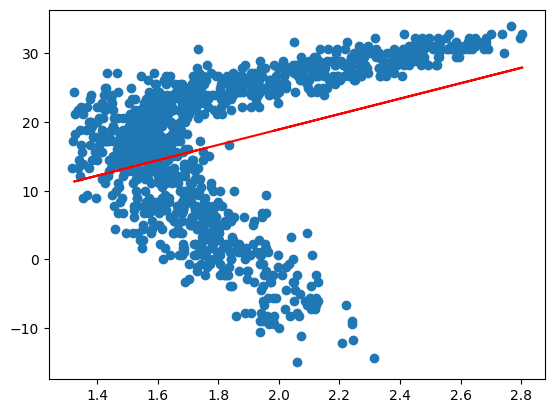

In [28]:
linear_prediction = model_1.predict(Xtest)
plt.plot(Xtest, linear_prediction, color='red')
plt.scatter(X, y)
plt.show()

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [29]:
# poly_2_model = PolynomialFeatures(include_bias=False, degree=2)
# X_poly_2 = poly_2_model.fit_transform(X_train)
# lin_2 = LinearRegression()
# lin_2.fit(X_poly_2, y_train)

features = PolynomialFeatures(degree=2, include_bias=False)
features_to_use = features.fit_transform(Xtrain)
model_2 = LinearRegression()
model_2.fit(features_to_use, Xtrain)


LinearRegression()

In [31]:
# two = compute_evaluation(X_poly_2, y_train, lin_2)
two = compute_evaluation(features_to_use, ytrain, model_2)

mean square error : 338.523
r2 score : -1.989
F statistics: -2.007
p-value: nan


In [35]:
# pred = lin_2.predict(poly_2_model.transform((np.arange(min(X.temp), max(X.temp))).reshape(-1,1)))
# plt.plot(np.arange(min(X.temp), max(X.temp)),pred, label = "poly",color="red")
# plt.legend()
# plt.scatter(X,y)
# plt.plot()

pred_2 = model_2.predict(Xtest)
plt.plot(Xtest, pred_2, color="red")
plt.legend()
plt.scatter(X, y)
plt.plot()

c:\Users\annad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

## Third experiment

#### Polynomial degree = 3

In [36]:
poly_3_model = PolynomialFeatures(include_bias=False, degree=3)
X_poly_3 = poly_3_model.fit_transform(Xtrain)
lin_3 = LinearRegression()
lin_3.fit(X_poly_3, ytrain)

LinearRegression()

In [38]:
three = compute_evaluation(X_poly_3, ytrain, lin_3)

mean square error : 86.95
r2 score : 0.232
F statistics: -0.232
p-value: nan


In [39]:
pred = lin_3.predict(poly_3_model.transform((np.arange(min(X.temp), max(X.temp))).reshape(-1,1)))
plt.plot(np.arange(min(X.temp), max(X.temp)),pred, label = "poly",color="red")
plt.legend()
plt.scatter(X,y)
plt.plot()

AttributeError: 'DataFrame' object has no attribute 'temp'

## Fourth experiment
### Polynomial degree = 4

In [96]:
# poly_4_model = PolynomialFeatures(include_bias=False, degree=4)
# X_poly_4 = poly_4_model.fit_transform(X_train)
# lin_4 = LinearRegression()
# lin_4.fit(X_poly_4, y_train)

LinearRegression()

In [97]:
# four = compute_evaluation(X_poly_4, y_train, lin_4)

mean square error : 0.022
r2 score : 0.784
F statistics: -0.781
p-value: nan


c:\Users\annad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


[]

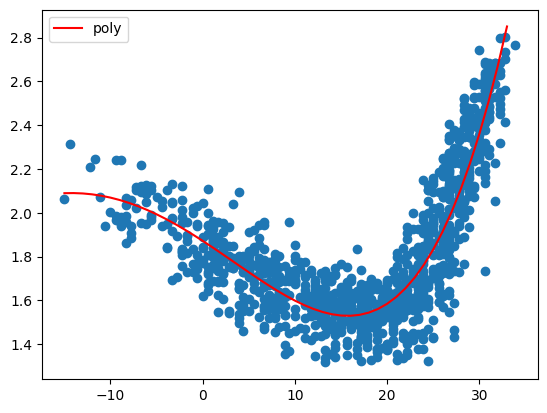

In [98]:
# pred = lin_4.predict(poly_4_model.transform((np.arange(min(X.temp), max(X.temp))).reshape(-1,1)))
# plt.plot(np.arange(min(X.temp), max(X.temp)),pred, label = "poly",color="red")
# plt.legend()
# plt.scatter(X,y)
# plt.plot()

## Compare the performance of the four models

In [99]:
# performance = {"linear ": [*one],
#                 "polynomial d = 2": [*two],
#                 "polynomial d = 3": [*three],
#                 "polynomial d = 4": [*four] }
# res = pd.DataFrame(performance, index = ['rmse'
#                      , 'r2'
#                      , 'f-statistic'
#                      , 'p-value'])

# res

,linear,polynomial d = 2,polynomial d = 3,polynomial d = 4
rmse,0.101651,0.034068,0.022300,0.022102
r2,0.168090,0.666485,0.781686,0.783630
f-statistic,-0.113405,-0.665616,-0.779648,-0.780565
p-value,NaN,NaN,NaN,NaN
